# **Business Case: Yulu - Hypothesis Testing**



**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands?

## Importing libraries and Downloading dataset

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

# Downloading dataset
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

## Basic Metrics

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

We can see that there are no null values and no duplicate values

## Exploratory Data Analysis

- Here Holiday data is included in the workingday column.
- Casual and Registered is summed to counts column.
- Also, temp and atemp gives us the similar info.
- So we can ignore these columns - holiday, casual, registered, temp

In [31]:
df = data.copy()

num_cols = ['atemp', 'humidity', 'windspeed', 'count']
cat_cols = ['season','weather', 'workingday']

# conversion of categorical attributes
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df['weather'] = data['weather'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# extrating months and days from datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['weekday'] = df['weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [32]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday
0,2011-01-01 00:00:00,Spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16,January,Saturday
1,2011-01-01 01:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40,January,Saturday
2,2011-01-01 02:00:00,Spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32,January,Saturday
3,2011-01-01 03:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13,January,Saturday
4,2011-01-01 04:00:00,Spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1,January,Saturday


### Statistical Analysis

In [34]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [35]:
df[cat_cols].describe()

,season,weather,workingday
count,10886,10886,10886
unique,4,4,2
top,Winter,Clear,Yes
freq,2734,7192,7412


### Analysis on categorical columns

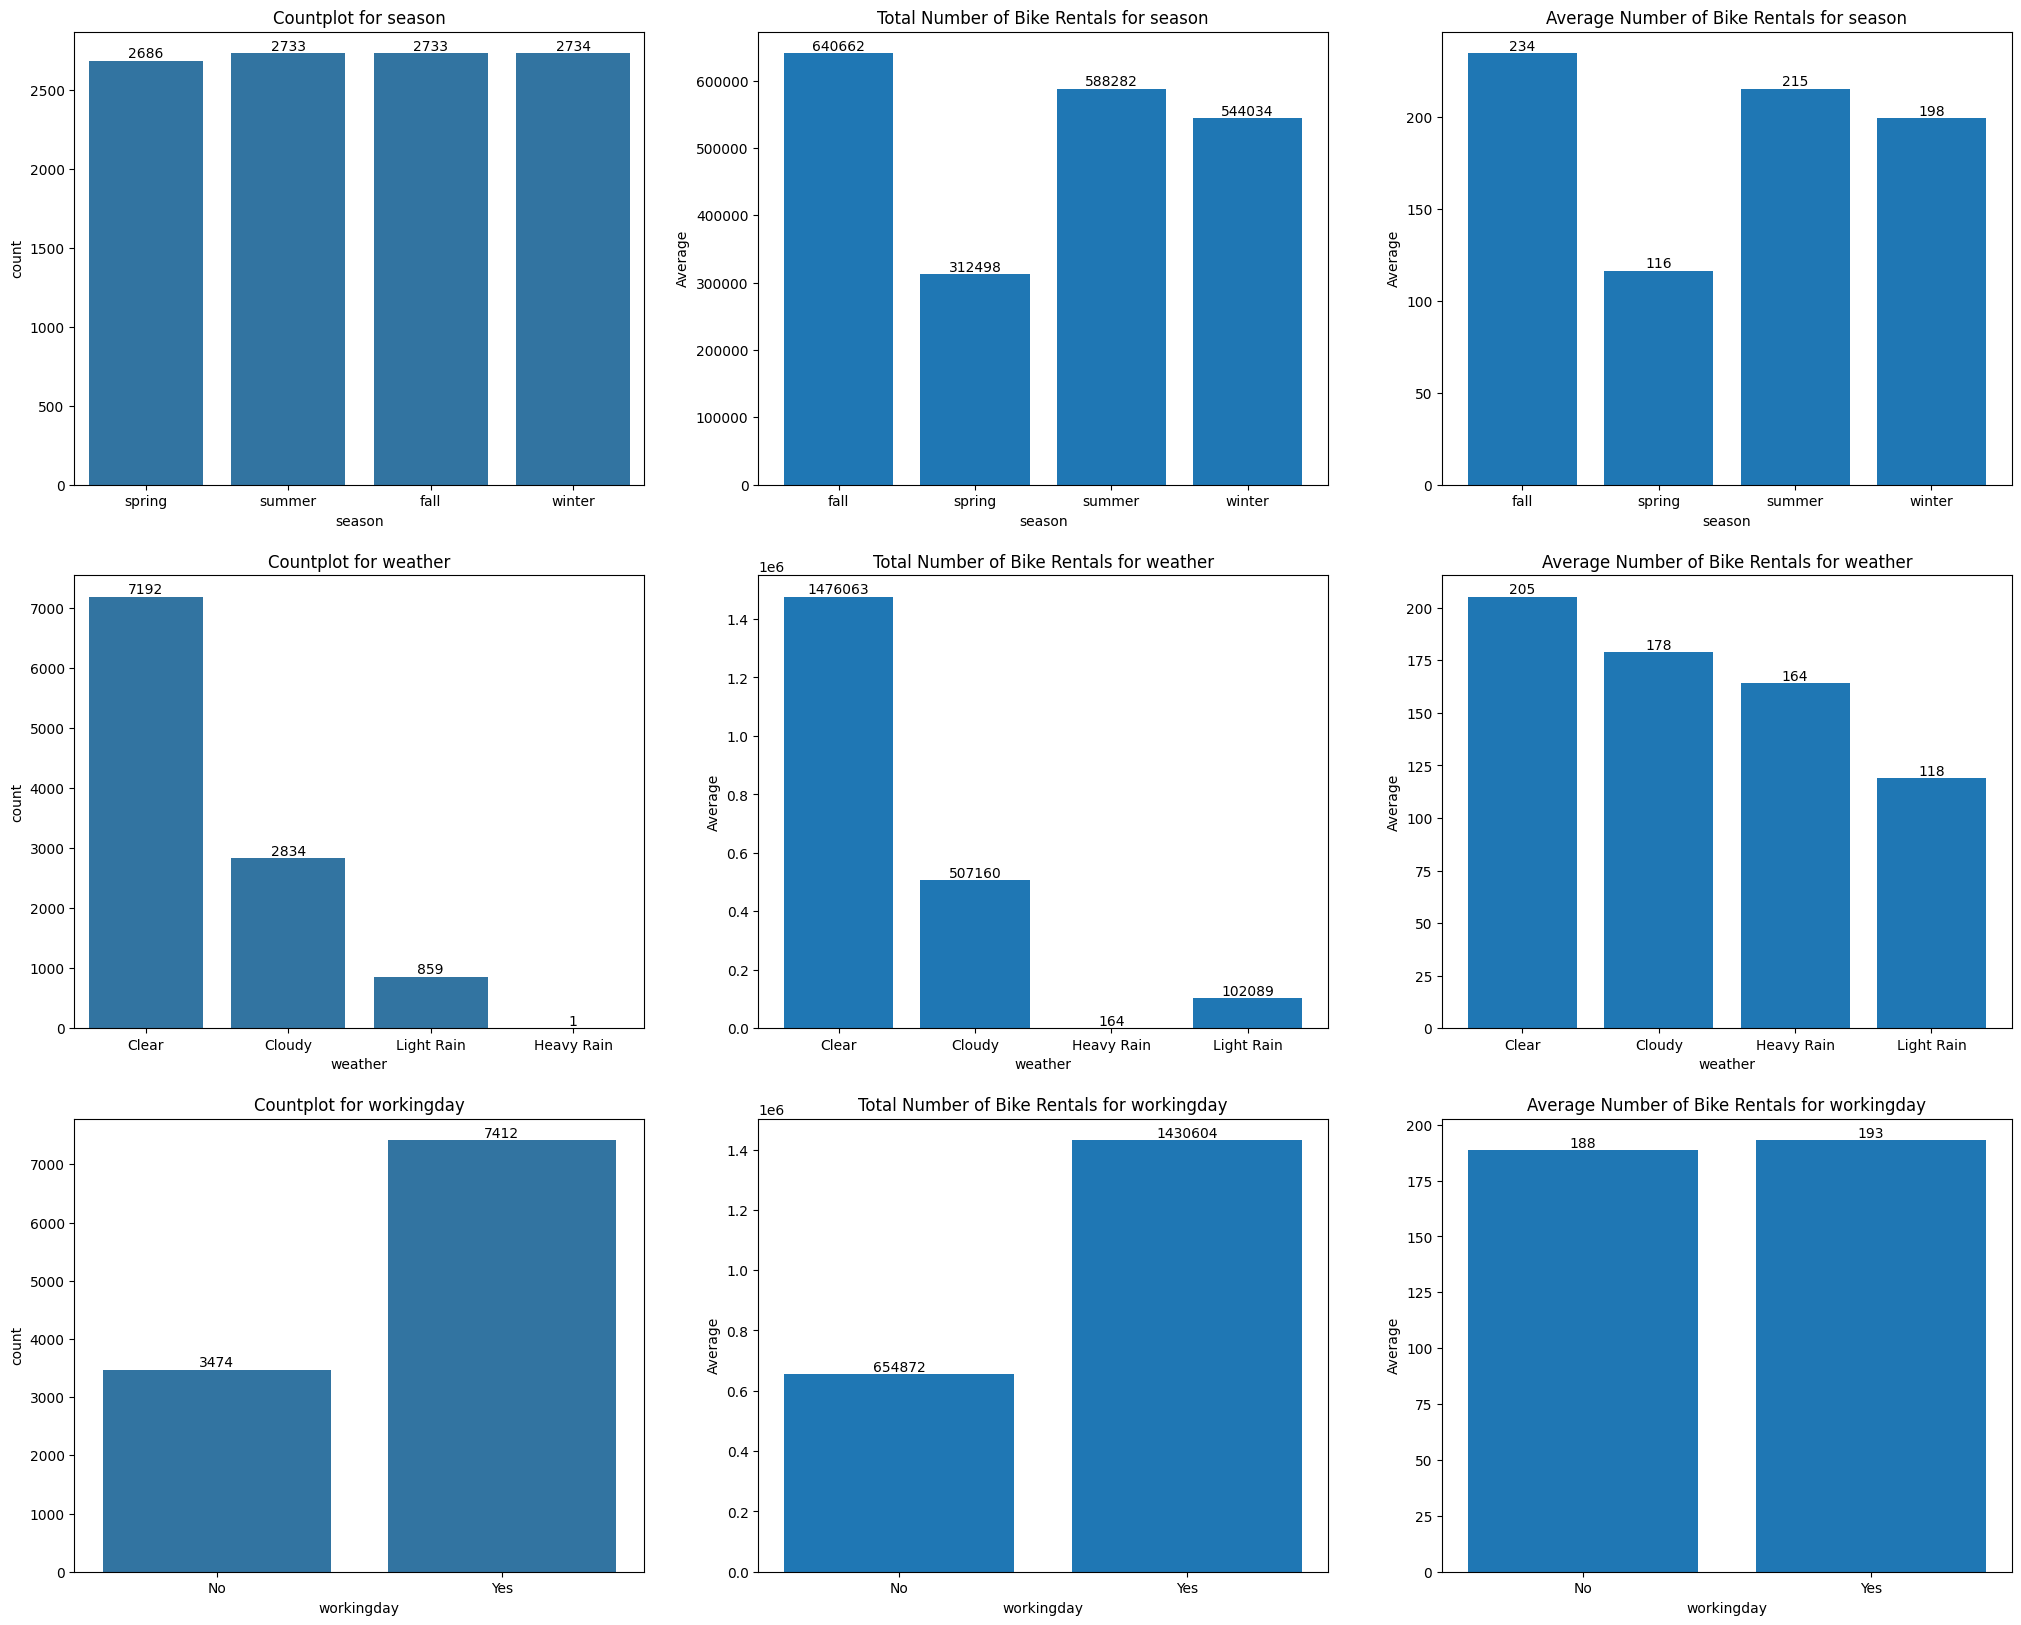

In [ ]:
# plots for categorical columns

plt.figure(figsize=(25, 20))

for i in cat_cols:
  plt.subplot(3, 3, cat_cols.index(i)*3+1)
  plt.title('Countplot for '+i)
  g = sns.countplot(df, x=i)
  for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

  plt.subplot(3, 3, cat_cols.index(i)*3+2)
  plt.title('Total Number of Bike Rentals for '+i)
  d = df.groupby(i)['count'].sum().reset_index()
  g = plt.bar(d[i],d['count'])
  plt.xlabel(i)
  plt.ylabel('Average')
  for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

  plt.subplot(3, 3, cat_cols.index(i)*3+3)
  plt.title('Average Number of Bike Rentals for '+i)
  d = df.groupby(i)['count'].mean().reset_index()
  g = plt.bar(d[i],d['count'])
  plt.xlabel(i)
  plt.ylabel('Average')
  for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.show()

- There are more bike rentals on fall season with a total count of 640662 and an average of 234.

- There are more bike rentals on Clear weather with a total count of 1476063 and an average of 205.

- There are more bike rentals on working day but we can't find much difference on average.

### Analysis on numerical columns

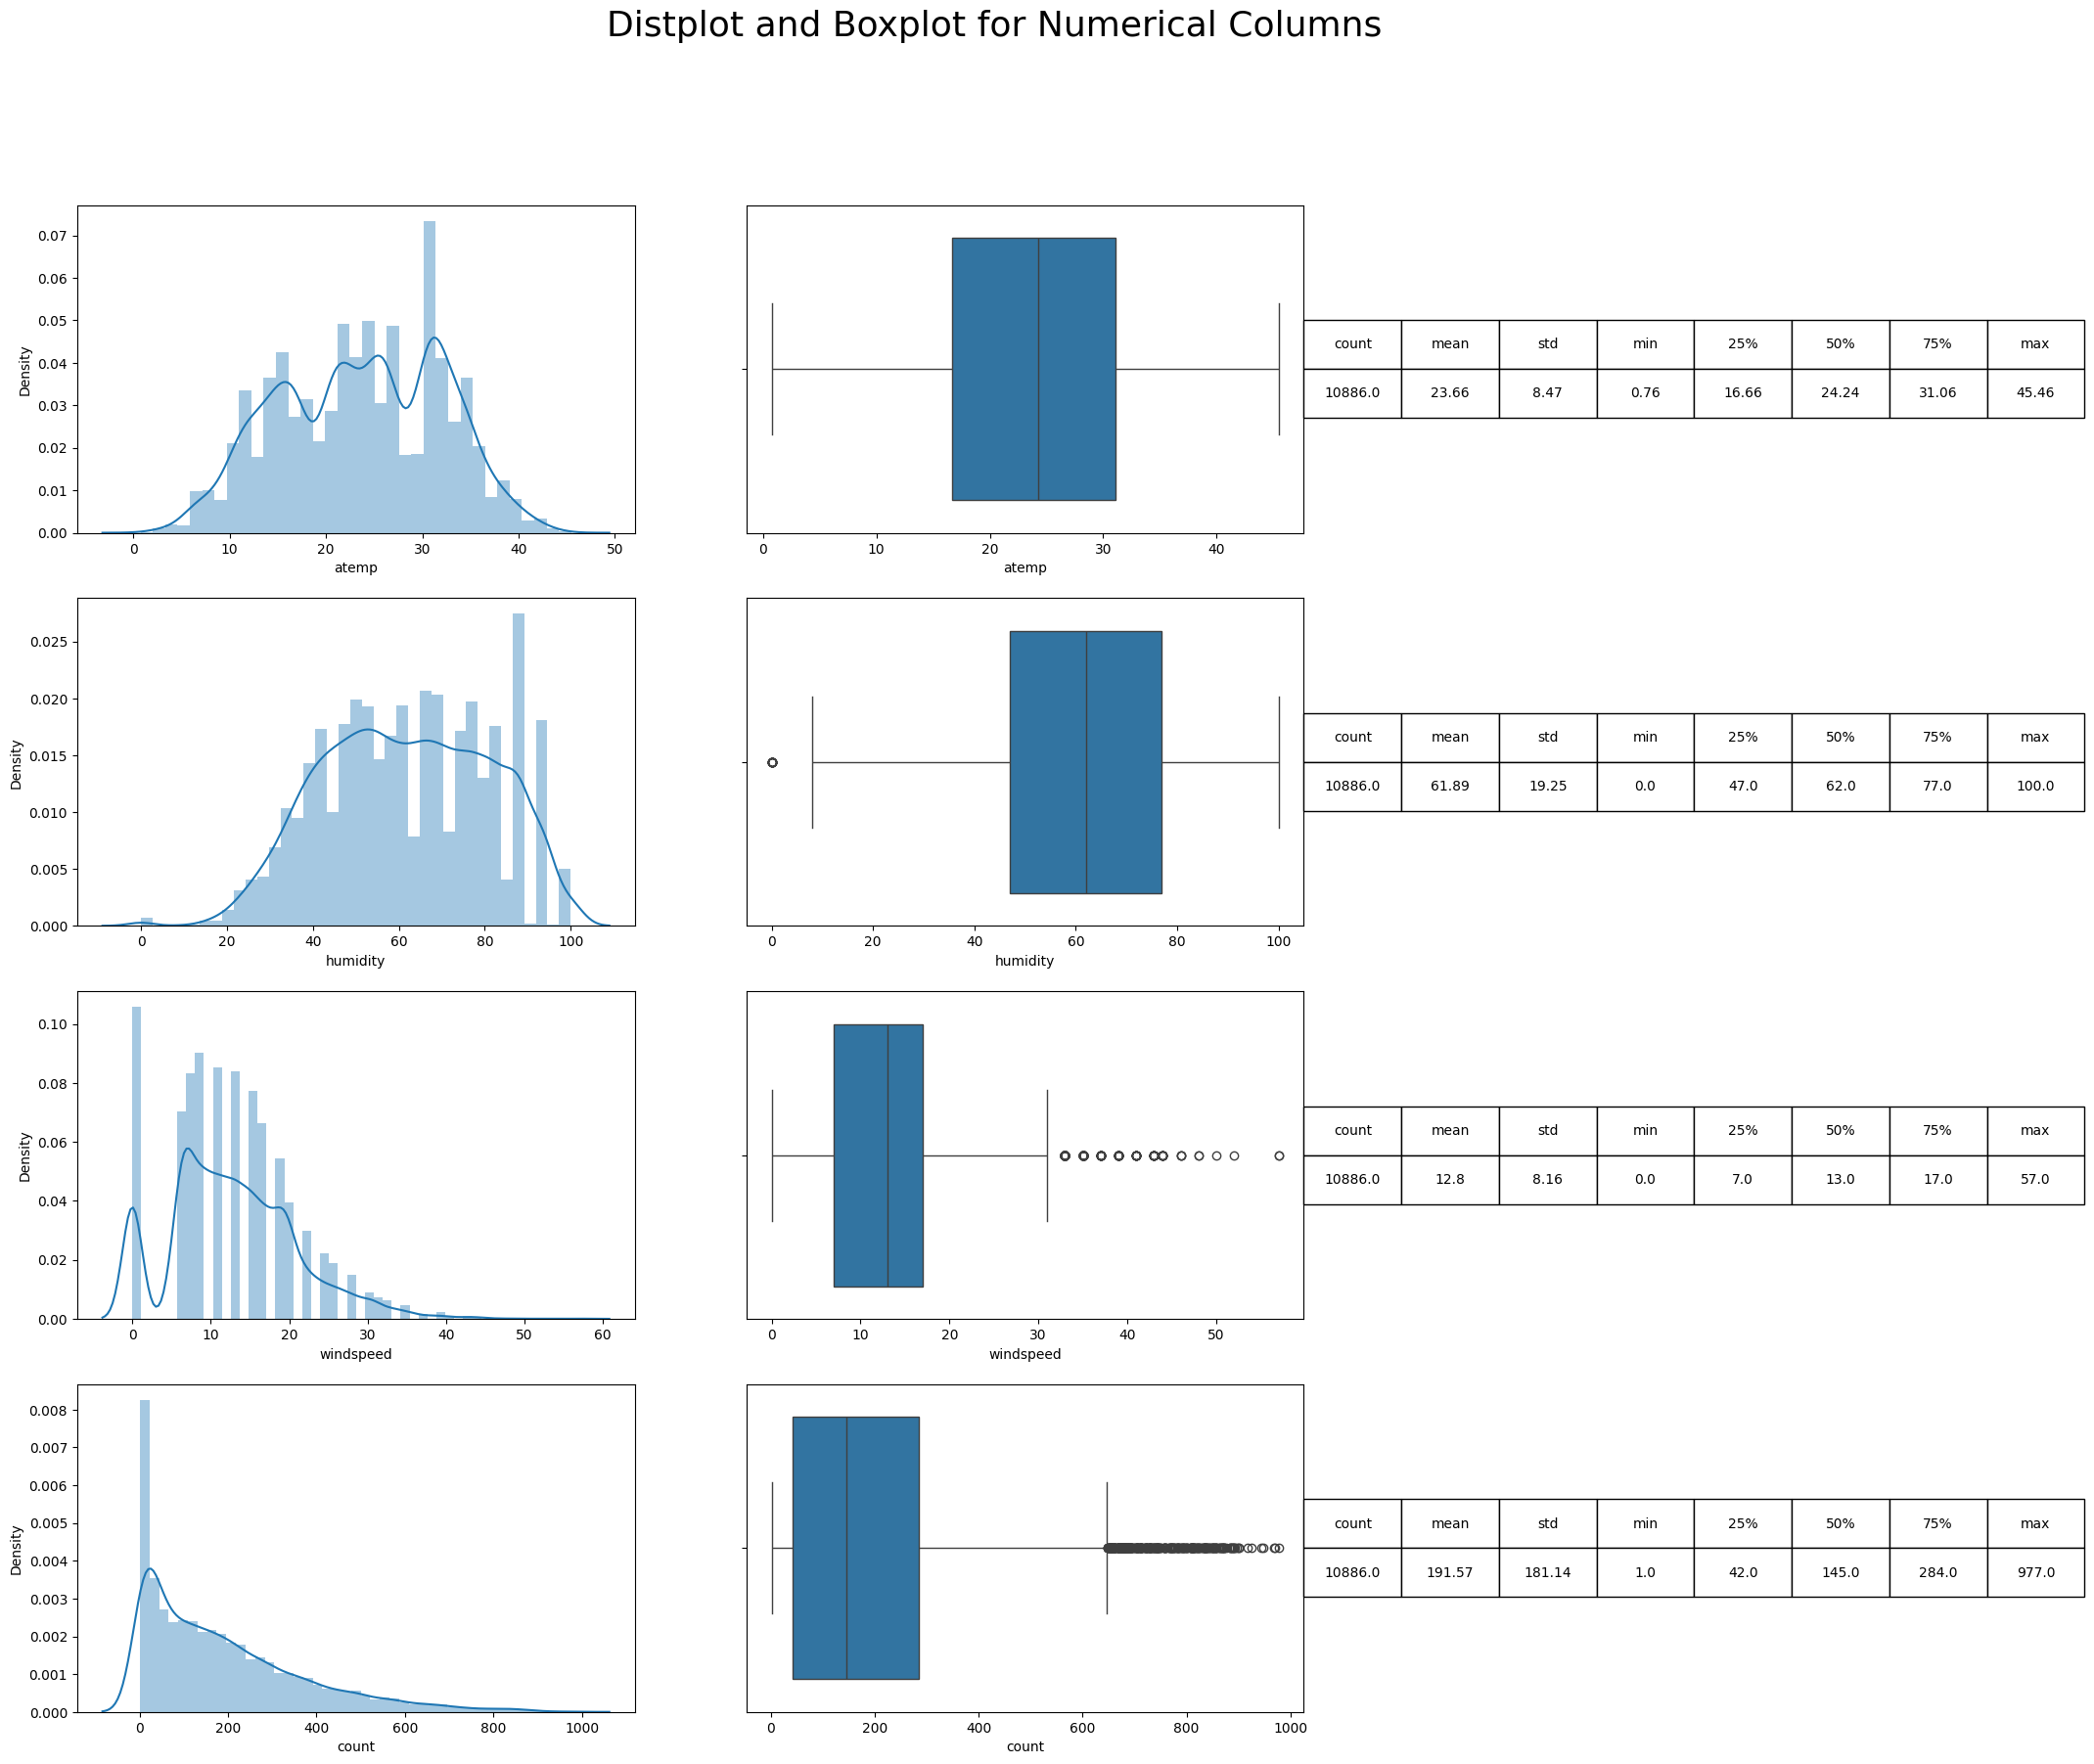

In [ ]:
# plots for Numerical columns

plt.figure(figsize=(25, 20)).suptitle('Distplot and Boxplot for Numerical Columns', size=26)

for i in num_cols:
  plt.subplot(4, 3, num_cols.index(i)*3+1)
  g = sns.distplot(df[i], kde=True)

  plt.subplot(4, 3, num_cols.index(i)*3+2)
  g = sns.boxplot(x=df[i])

  plt.subplot(4, 3, num_cols.index(i)*3+3)
  statistics = df[i].describe().round(2)
  table = plt.table(colLabels=statistics.index, cellText=[statistics.values], loc='center', cellLoc='center')
  table.scale(1.4,3)
  plt.axis('off')

plt.show()

- The **atemp** column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.
- The **humidity** column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.
- The **windspeed** column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.
- The **count** column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values.

### Analysis on months and days

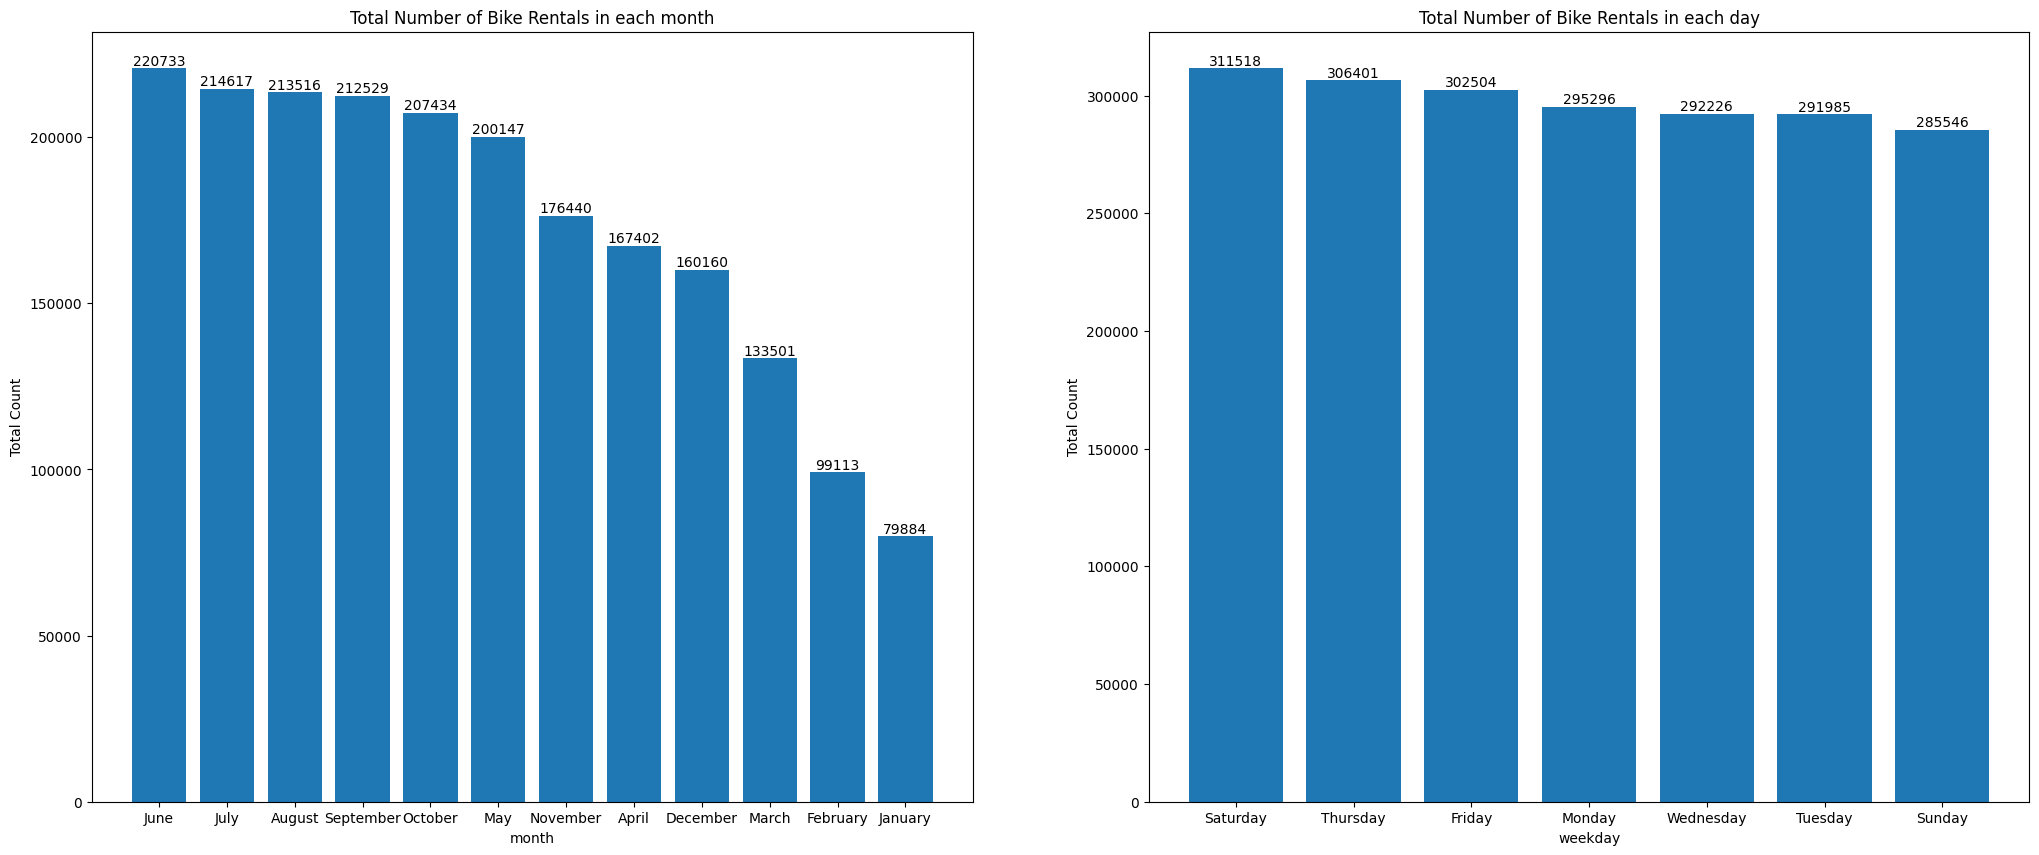

In [48]:
plt.figure(figsize=(25, 10))

plt.subplot(1,2,1)
plt.title('Total Number of Bike Rentals in each month')
d = df.groupby('month')['count'].sum().reset_index().sort_values(by='count', ascending=False)
g = plt.bar(d['month'],d['count'])
plt.xlabel('month')
plt.ylabel('Total Count')
for j in g.patches:
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.subplot(1,2,2)
plt.title('Total Number of Bike Rentals in each day')
d = df.groupby('weekday')['count'].sum().reset_index().sort_values(by='count', ascending=False)
g = plt.bar(d['weekday'],d['count'])
plt.xlabel('weekday')
plt.ylabel('Total Count')
for j in g.patches:
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

- June stands out as the peak month for bike rentals, with the highest count of 220733, followed closely by July and August.
- January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

- Saturday stands out as the peak day for bike rentals and also we can see that there is mo much difference in bike rentals among weekdays.

## Correlation and Pair Plot

### Heat Map

In [ ]:
corr_df = data.corr(numeric_only=True)
corr_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


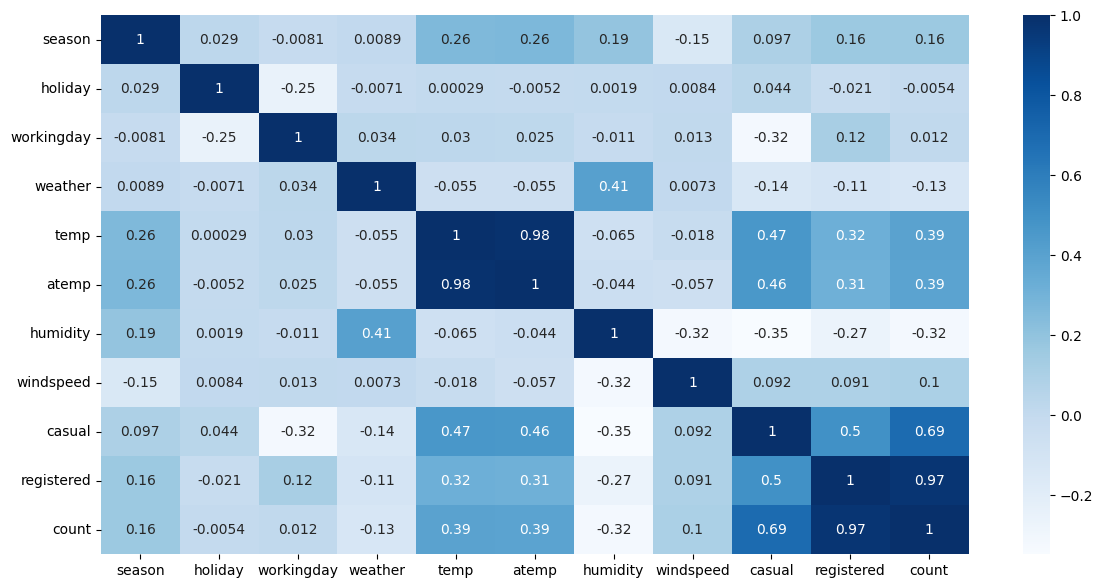

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_df, annot=True, cmap='Blues')
plt.show()

**count** column seems to have ***positive*** correlation with **atemp** and and ***negative*** with **humidity**. We can see people go out with bike more when the temp is high and humidity is low.


### Pair plot

In [ ]:
sns.pairplot(data, hue='workingday')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Hypothesis Testing

### Effect of Working Day on Bike Rentals

In [ ]:
df.groupby('workingday')['count'].mean()

workingday
No     188.506621
Yes    193.011873
Name: count, dtype: float64

Since this is categorical vs numerical having only 2 categorical fields, we can use 2 sample T-test

**Null Hypothesis:** Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day

**Alternate Hypothesis:** Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day

In [50]:
# using 2 sample ttest
t_stat, p_val = stats.ttest_ind(df[df['workingday'] == 'Yes']['count'], df[df['workingday'] == 'No']['count'], alternative='greater')

In [51]:
H0 = 'Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day'
Ha = 'Average number of bike rentals on the working day is greater than the average number of bike rentals on the non-working day'
alpha = 0.05

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: 1.2096277376026694
p-value: 0.11322402113180674
alpha: 0.05

Result: Failed to reject Null Hypothesis
Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day


### Effect of Season on Bike Rentals

In [ ]:
df.groupby('season')['count'].mean()

season
fall      234.417124
spring    116.343261
summer    215.251372
winter    198.988296
Name: count, dtype: float64

This is categorical vs numerical having 4 (more than 2) categorical fields, we can use one-way anova test if it follows anova assumptions or else we have to use krustal wallis test

#### Assumptions of Anova:

1. Data should follow a Gaussian distribution
2. Independent groups
3. Equal variance in all the groups

**1. Normality Test**

For this, curve test and qq-plot has to be used

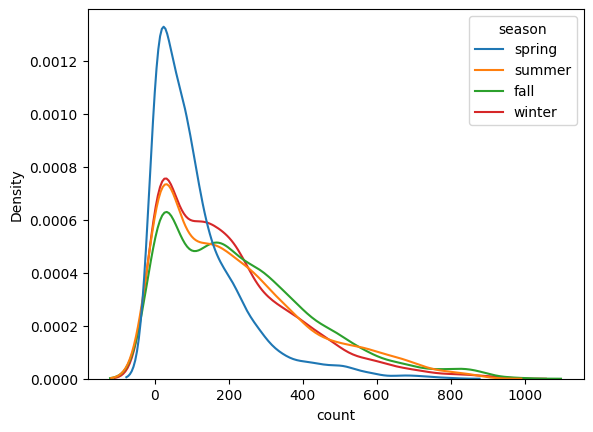

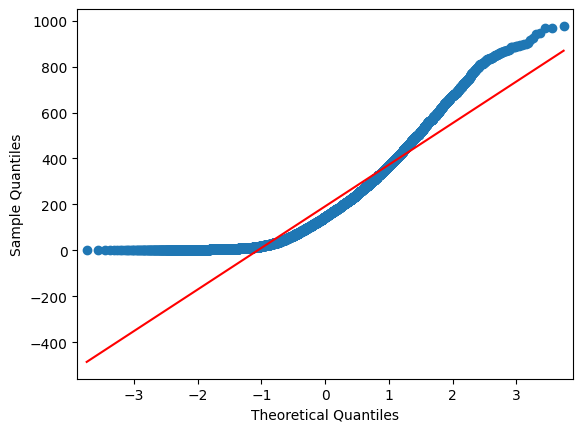

In [ ]:
# curve test
sns.kdeplot(df, x='count', hue='season')

# Q-Q plot
sm.qqplot(df['count'], line='s')

plt.show()

From the plots, it is clear that the data is not a normal distribution.

**2. Independent groups**

This condition is already satisfied since all seasons are independent of each other

**3. Equal Variance Test**

For this, levene test is used

In [ ]:
H0 = 'Variance is same for all seasons'
Ha = 'Variance is not same for all seasons'

# levene test
alpha = 0.05
stat, p_val = stats.levene(df[df['season'] == 'spring']['count'], df[df['season'] == 'summer']['count'], df[df['season'] == 'fall']['count'], df[df['season'] == 'winter']['count'])

print(f'levene-statistic: {stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)


levene-statistic: 187.7706624026276
p-value: 1.0147116860043298e-118
alpha: 0.05

Result: Reject Null Hypothesis
Variance is not same for all seasons


From this, we can say that variance is not same for all seasons and third assumption failed.

This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

So we have to try Kruskal Wallis Test

#### Kruskal Wallis Test

**Null Hypothesis:** Average number of bike rentals is same for all the seasons.

**Alternate Hypothesis:** Average number of bike rentals is different for different seasons.

In [ ]:
H0 = 'Average number of bike rentals is same for all the seasons'
Ha = 'Average number of bike rentals is different for different seasons'

# Kruskal wallis Test
alpha = 0.05
stat, p_val = stats.kruskal(df[df['season'] == 'spring']['count'], df[df['season'] == 'summer']['count'], df[df['season'] == 'fall']['count'], df[df['season'] == 'winter']['count'])

print(f'kruskal-statistic: {stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

kruskal-statistic: 699.6668548181988
p-value: 2.479008372608633e-151
alpha: 0.05

Result: Reject Null Hypothesis
Average number of bike rentals is different for different seasons


### Effect of Weather on Bike Rentals

In [ ]:
df.groupby('weather')['count'].mean()

weather
Clear         205.236791
Cloudy        178.955540
Heavy Rain    164.000000
Light Rain    118.846333
Name: count, dtype: float64

This is categorical vs numerical having 4 (more than 2) categorical fields, we can use one-way anova test if it follows anova assumptions or else we have to use krustal wallis test

#### Assumptions of Anova:

1. Data should follow a Gaussian distribution
2. Independent groups
3. Equal variance in all the groups

**1. Normality Test**

For this, curve test and qq-plot has to be used

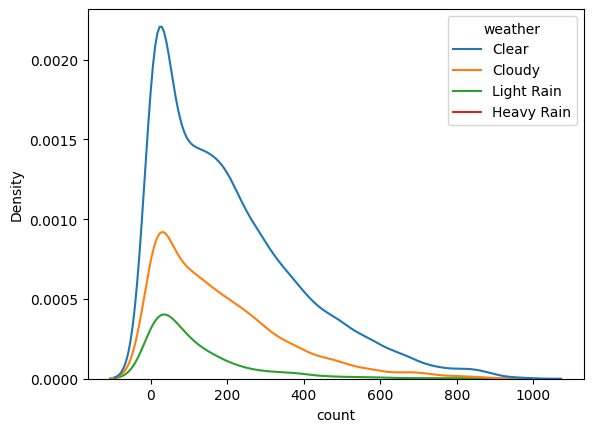

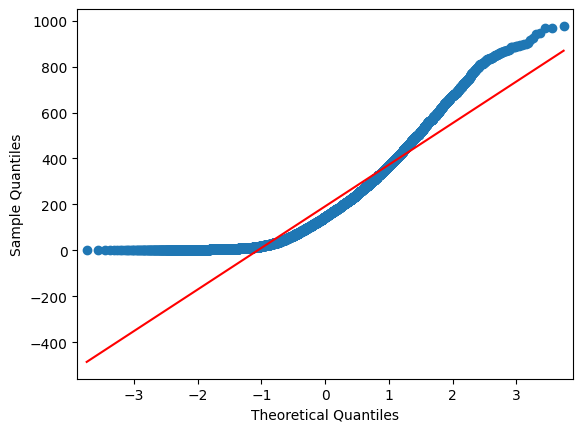

In [ ]:
# curve test
sns.kdeplot(df, x='count', hue='weather')

# Q-Q plot
sm.qqplot(df['count'], line='s')

plt.show()

From the plots, it is clear that the data is not a normal distribution.

**2. Independent groups**

This condition is already satisfied since all weather conditions are independent of each other

**3. Equal Variance Test**

For this, levene test is used

In [ ]:
H0 = 'Variance is same for all weather conditions'
Ha = 'Variance is not same for all weather conditions'

# levene test
alpha = 0.05
stat, p_val = stats.levene(df[df['weather'] == 'Clear']['count'], df[df['weather'] == 'Cloudy']['count'], df[df['weather'] == 'Heavy Rain']['count'], df[df['weather'] == 'Light Rain']['count'])

print(f'levene-statistic: {stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)


levene-statistic: 54.85106195954556
p-value: 3.504937946833238e-35
alpha: 0.05

Result: Reject Null Hypothesis
Variance is not same for all weather conditions


From this, we can say that variance is not same for all weather conditions and third assumption failed.

This data is not suitable to perform a ANOVA test since the first and third assumptions are not met.

So we have to try Kruskal Wallis Test

#### Kruskal Wallis Test

**Null Hypothesis:** Average number of bike rentals is same for all weather conditions.

**Alternate Hypothesis:** Average number of bike rentals is different for different weather conditions.

In [ ]:
H0 = 'Average number of bike rentals is same for all weather conditions'
Ha = 'Average number of bike rentals is different for different weather conditions'

# Kruskal wallis Test
alpha = 0.05
stat, p_val = stats.kruskal(df[df['weather'] == 'Clear']['count'], df[df['weather'] == 'Cloudy']['count'], df[df['weather'] == 'Heavy Rain']['count'], df[df['weather'] == 'Light Rain']['count'])

print(f'kruskal-statistic: {stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

kruskal-statistic: 205.00216514479087
p-value: 3.501611300708679e-44
alpha: 0.05

Result: Reject Null Hypothesis
Average number of bike rentals is different for different weather conditions


###  Effect of Weather on Season

In [ ]:
ws_table = pd.crosstab(df['weather'], df['season'])
ws_table

season,fall,spring,summer,winter
weather,,,,
Clear,1930,1759,1801,1702
Cloudy,604,715,708,807
Heavy Rain,0,1,0,0
Light Rain,199,211,224,225


This is categorical vs categorical, we can use chi-square test.

**Null Hypothesis:** Weather and Season are Independent

**Alternate Hypothesis:** Weather and Season are Dependent

In [ ]:
H0 = 'Weather and Season are Independent'
Ha = 'Weather and Season are Dependent'

# chi-square test
alpha = 0.05
stat, p_val= stats.chi2_contingency(ws_table)[0], stats.chi2_contingency(ws_table)[1]

print(f'chi-statistic: {stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')

if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)


chi-statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
alpha: 0.05

Result: Reject Null Hypothesis
Weather and Season are Dependent


# Insights

- There are more bike rentals on fall season.

- There are more bike rentals on Clear weather.

- There are more bike rentals on working day but we can't find much difference on average.

- June stands out as the peak month for bike rentals, followed closely by July and August.

- January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

- Saturday stands out as the peak day for bike rentals and also we can see that there is mo much difference in bike rentals among weekdays.

- count column has positive correlation with atemp and and negative with humidity. We can see people go out with bike more when the temp is high and humidity is low.

- Working day doesn't affect bike rentals i.e., Average number of bike rentals on the working day is same as the average number of bike rentals on the non-working day.

- Season affect bike rentals i.e., Average number of bike rentals is different for different seasons.

- Weather affect bike rentals i.e., Average number of bike rentals is different for different weather conditions.

- Weather and Season columns depends on each other.

# Recommendations

- **Flexible Pricing Models:** Implement dynamic pricing models that adjust rental rates based on demand, season, and weather conditions to maximize revenue and utilization.

- **Inventory Management:** Ensure adequate availability of bikes during peak seasons and weekends. Conversely, optimize maintenance schedules during off-peak months to ensure bikes are ready for high-demand periods.

- **Fall Season Promotions:** Since there are more rentals in the fall, consider offering seasonal promotions such as discounts for long-term rentals or special deals for new customers.

- **Winter Incentives:** Given the lower rentals in January, February, and March, implement winter incentives like reduced prices, special bundled offers (e.g., bike rental plus hot beverage), or loyalty rewards for frequent renters.

- **Clear Weather Marketing:** Increase marketing efforts during clear weather days. Utilize weather forecasts to predict clear days and promote bike rentals through social media, email campaigns, and local advertising.

- **Rainy Day Discounts:** Offer discounts or incentives on rainy or less clear days to encourage rentals despite the weather conditions.

- **Weekend rider programs:** Develop weekend rental packages or extend Saturday operating hours to capitalize on the observed peak ridership on Saturdays.

- **Partner with Local Events:** Collaborate with local events, festivals, and outdoor activities during peak months and clear weather days to offer bike rentals as a convenient transportation option, thereby increasing visibility and rentals.

- **Surveys and Feedback:** Regularly gather feedback from customers about their preferences for seasons, weather conditions, and rental experiences to fine-tune strategies and improve service offerings.

- **Loyalty Programs:** Develop loyalty programs that reward frequent renters, especially targeting those who rent bikes during off-peak periods to encourage repeat business.